# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 0304 Голиков Анатолий, Решоткин Артём и Крицын Данила. Вариант №5.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения
#### Дискретный сигнал
Дискретный сигнал: $x_0, x_1, ..., x_{N-1}$ можно получить при помощи дискретизации аналогового сигнала $s(t)$.
Допустим, что отчёты $x_k, k = 0,1,...,N - 1$ дискретного сигнала получены в результаты равномерной дискретизации сигнала s(t) с шагом дискретизации, равным 1.
$$x_k = s(t_k), k = 0, 1, ..., N - 1;$$
$$t_k - t_{k-1} = T, k = 1, ..., N - 1; T = 1.$$
#### Спектр дискретного сигнала
Представим дискретный сигнал как функцию от времени.
$$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$$
При помощи преобразования Фурье спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $2\pi$.
$$S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}$$
Дискретный сигнал можно записать в виде
$$s_d(t) = \frac{1}{T}\sum_{k=-\infty}^{\infty} s(t)e^{i\omega_k t}$$
Спектр дискретного сигнала можно записать в виде
$$S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^{\infty} S(\omega - \frac{2\pi k}{T})$$
#### Теорема Котельникова
Сигнал $s(t)$, не содержащий гармоник с частотами, превышающими $\widehat{\omega} = 2\pi \widehat{f}$, может быть представлен без потери информации своими дискретными отсчётами $s(kT)$, удовлетворяющими условию
$$T \le \frac{1}{2\widehat{f}} = \frac{\pi}{\widehat{\omega}}$$
Восстановить исходный сигнал можно по формуле - разложению s(t) в ряд по системе функций:
$$s(t) = \sum_{k=-\infty}^{\infty} s(kT)\varphi_k(t)$$
где базис Котельникова
$$\varphi_k(t) = \frac{sin(\pi\frac{t - kT}{T})}{(\pi\frac{t - kT}{T})}$$
#### Дискретное преобразование Фурье
Пусть последовательность отсчётов ${x_k}$ является периодической с периодом $N$:
$$x_{k+N} = x_k \forall k$$
Расммотрим фрагмент последовательности из N отсчётов: $\{x_k: k = 0,1,2,...,N-1\}$. Тогда дискретная функция
$$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - kT)$$
тоже будет периодической с периодом NT, где T - период дискретизации.
Спектр $s(t)$ также должен быть периодическим с периодом $T = \frac{2\pi}{T}$ и дискретным с расстоянием между гармониками, равным $\frac{2\pi}{NT}$.
Так как $s(t)$ является периодической функцией, её можно разложить в ряд Фурье, коэффициенты которого вычисляются по следующей формуле:
$$X(n) = \sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}, n = 0,1,2,...,N-1$$
Обратной дискретное преобразование Фурье:
$$x_k = \frac{1}{N} \sum_{n=0}^{N-1} X(n) e^{i\frac{2\pi k}{N}n}, k=0,1,2,...,N-1$$

## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

#### 1. Сформировать дискретный сигнал посредством дискретизации с шагом T = 1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\varDelta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N = 31)$.

Исходный аналоговый сигнал:
$$s(t) = \sum_{k=0}^{10} A_k cos(\omega_k t + \varphi_k)$$
Сформированный дискретный сигнал:
$$x_k = s(t_k), k=0 ...N,N=31,t_k - t_k-1 = T = 1.$$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft, fftshift, rfft

N = 31
T = 1

t_analog = np.arange(0, N + 0.01, 0.01)
t_args = np.arange(0, N + T, T)
w_k = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
A_k = np.random.randint(1, 11, 11)
A_k = A_k / sum(A_k)
fi_k = np.random.random(size=11) / 2
print(w_k)
print(A_k)
print(fi_k)

[0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265]
[0.05172414 0.03448276 0.10344828 0.17241379 0.13793103 0.10344828
 0.10344828 0.0862069  0.06896552 0.0862069  0.05172414]
[0.21612814 0.48283678 0.42352455 0.33507629 0.01407316 0.03096197
 0.38304477 0.01901646 0.48252862 0.04092849 0.05605593]


#### 2. Визуализировать исходные аналоговый и дискретизированный сигналы.

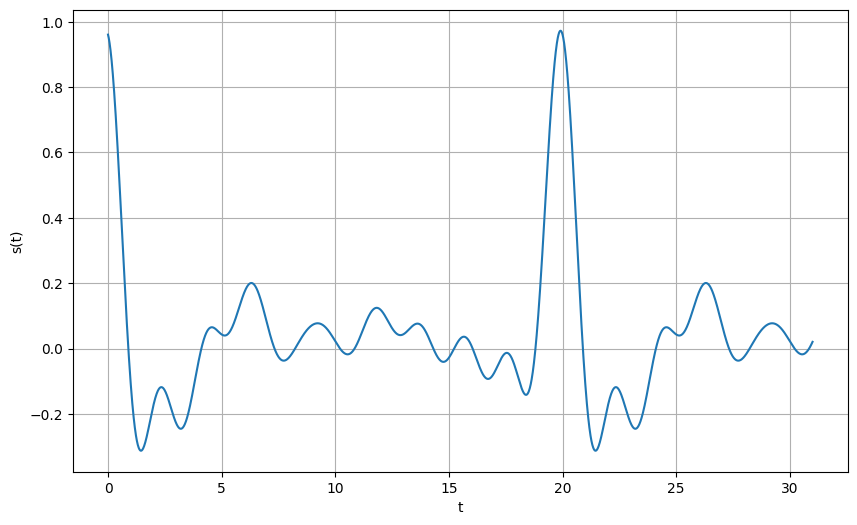

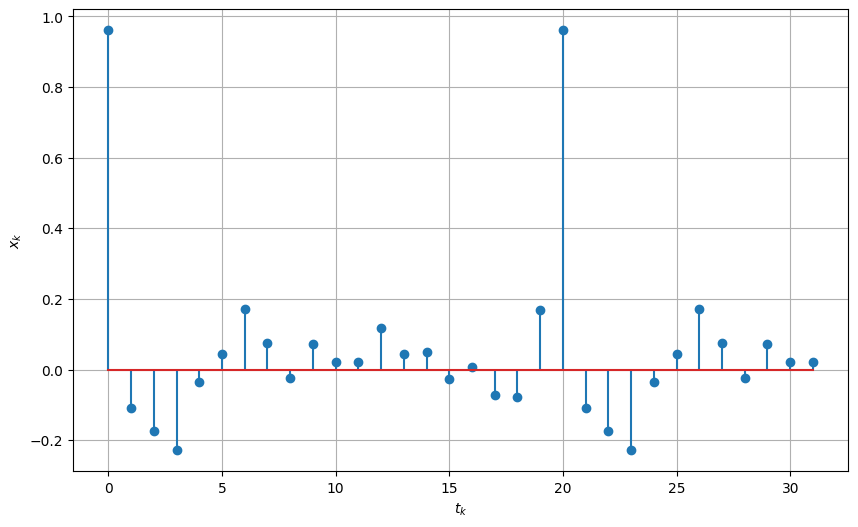

In [2]:
def s(t):
    r = 0
    for i in range(11):
        r += A_k[i] * math.cos(w_k[i] * t + fi_k[i])
    return r

plt.figure(figsize=(10, 6))
plt.plot(t_analog, [s(t) for t in t_analog])
plt.ylabel("s(t)")
plt.xlabel("t")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(t_args, [s(t) for t in t_args])
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.grid()
plt.show()

#### 3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

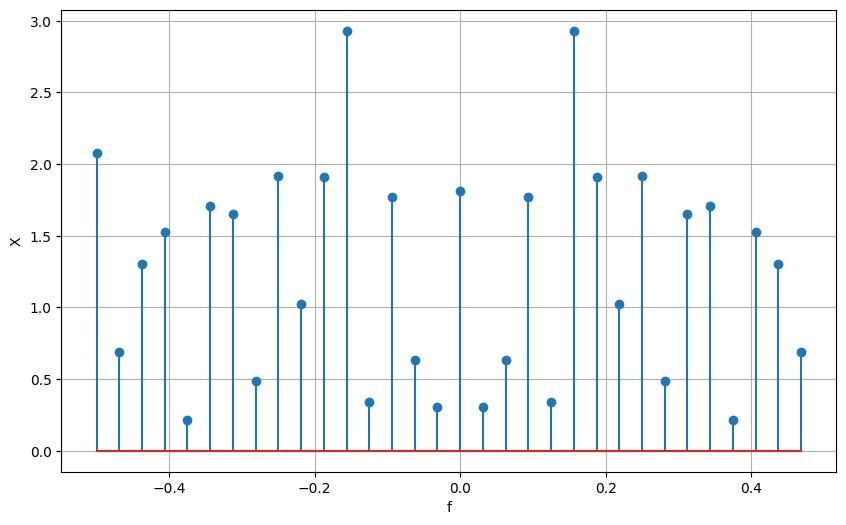

In [3]:
def dft(x):
 x = np.asarray(x, dtype=float)
 N = x.shape[0]
 n = np.arange(N)
 k = n.reshape((N, 1))
 M = np.exp(-2j * np.pi * k * n / N)
 return np.dot(M, x)

f_vals = fftfreq(N + 1, T)
X_vals = np.abs(dft([s(t) for t in t_args]))
plt.figure(figsize=(10, 6))
plt.stem(f_vals, X_vals)
plt.ylabel("X")
plt.xlabel("f")
plt.grid()
plt.show()

#### 4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.
Формулы для линейного сглаживания по 5 и 9 точкам имеют следующий вид:
$$y_{n,5} = \frac{1}{5} \sum_{k=-2}^{k=2} x_{n+k}$$
$$y_{n,9} = \frac{1}{9} \sum_{k=-4}^{k=4} x_{n+k}$$
Передаточные функции имеют следующий вид:
$$H_5(\omega) = \frac{1}{5} (1+2cos(\omega)+2cos(2\omega))$$
$$H_9(\omega)=\frac{1}{9} (1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega))$$

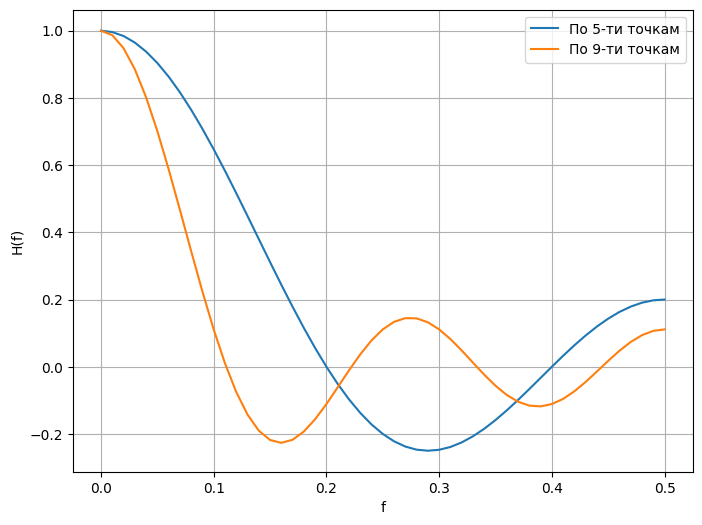

In [4]:
def h_5(f):
 return (1 + 2 * math.cos(2 * math.pi * f) + 2 * math.cos(4 * math.pi * f)) / 5
def h_9(f):
 return (1 + 2 * math.cos(2 * math.pi * f) + 2 * math.cos(4 * math.pi * f) + 2 * math.cos(6 * math.pi * f) + 2 * math.cos(8 * math.pi * f)) / 9

f_vals_for_h = np.arange(0, 0.5 + 0.01, 0.01)
plt.figure(figsize=(8, 6))
plt.plot(f_vals_for_h, [h_5(f) for f in f_vals_for_h], label="По 5-ти точкам")
plt.plot(f_vals_for_h, [h_9(f) for f in f_vals_for_h], label="По 9-ти точкам")
plt.ylabel("H(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

#### 5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

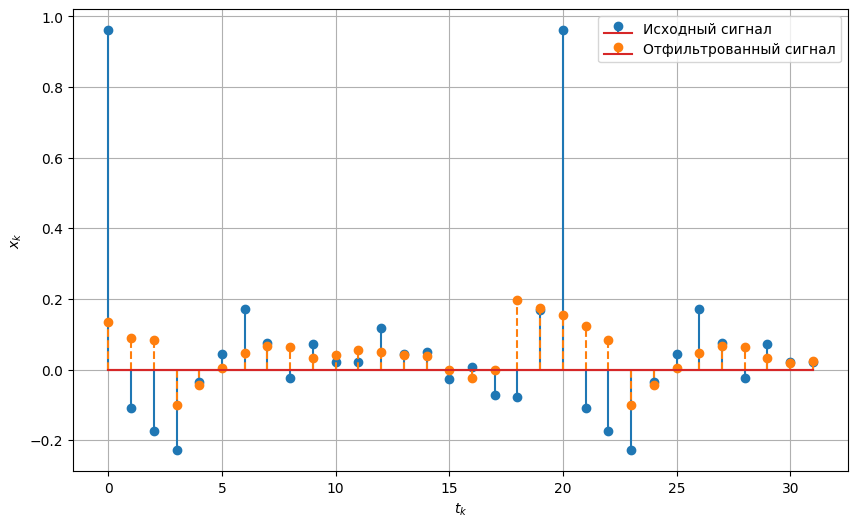

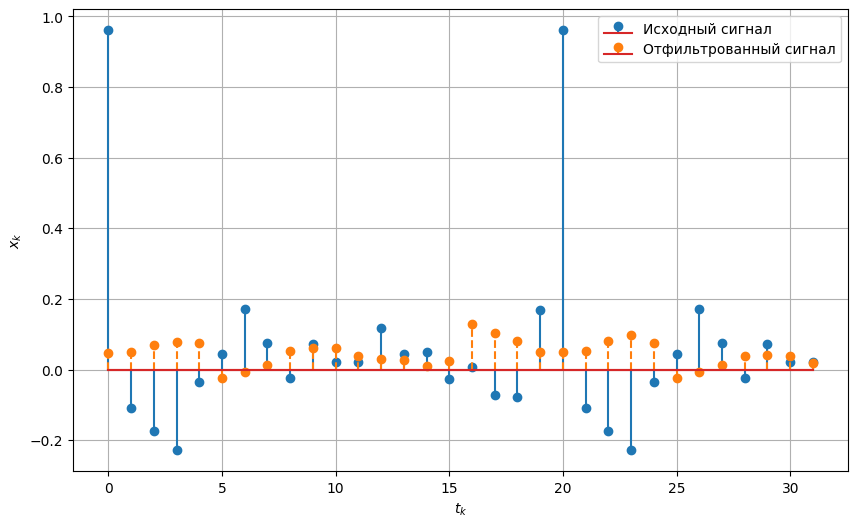

In [5]:
x_vals = [s(t) for t in t_args]
x_vals_5 = np.convolve(x_vals, np.ones(5), 'same') / 5
x_vals_9 = np.convolve(x_vals, np.ones(9), 'same') / 9

plt.figure(figsize=(10, 6))
plt.stem(t_args, x_vals, label="Исходный сигнал")
plt.stem(t_args, x_vals_5, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(t_args, x_vals, label="Исходный сигнал")
plt.stem(t_args, x_vals_9, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

#### 6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

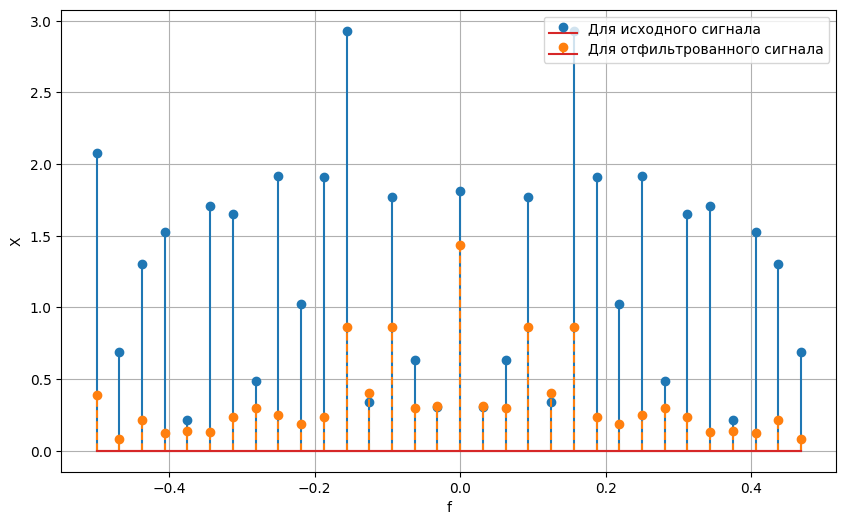

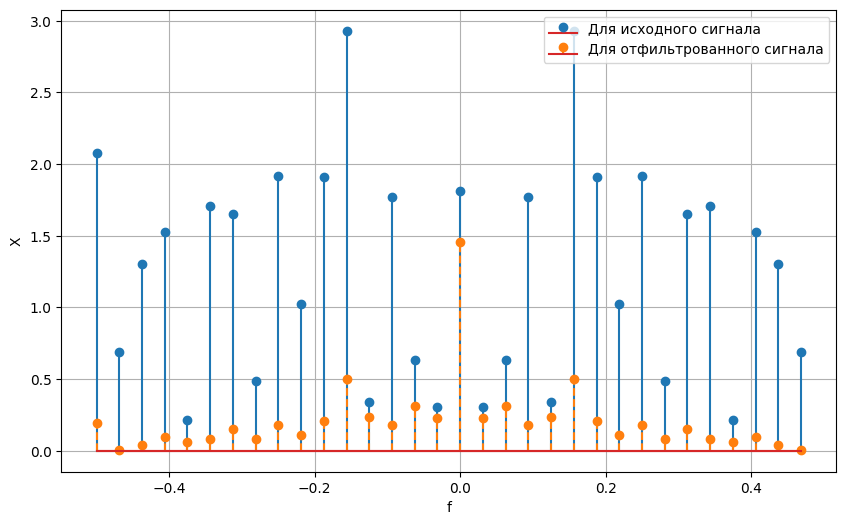

In [6]:
f_vals = fftfreq(N + 1, T)
X_vals_5 = np.abs(dft(x_vals_5))
plt.figure(figsize=(10, 6))
plt.stem(f_vals, X_vals, label="Для исходного сигнала")
plt.stem(f_vals, X_vals_5, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

f_vals = fftfreq(N + 1, T)
X_vals_9 = np.abs(dft(x_vals_9))
plt.figure(figsize=(10, 6))
plt.stem(f_vals, X_vals, label="Для исходного сигнала")
plt.stem(f_vals, X_vals_9, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

#### 7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.
Анализ представленного спектра показывает, что сигналы с нулевой частотой (постоянного уровня) проходят без ослабления. Сигналы с частотами, близкими к нулю, ослабляются незначительно, тогда как сигналы с высокими частотами испытывают значительное ослабление. По мере увеличения количества точек, полоса пропускания уменьшается. Эти выводы подтверждаются на графиках передаточных функций, представленных выше.

#### 8. Повторить п. 4–7 для следующих фильтров:
#### a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
#### b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).
**A. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.**
Формула для дискретного фильтра, соответствующего численному дифференцированию 1-го порядка:
$$s'n = \frac{s_{n+1} - s_{n-1}}{2h}$$
$$H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2} = isin(\omega)$$

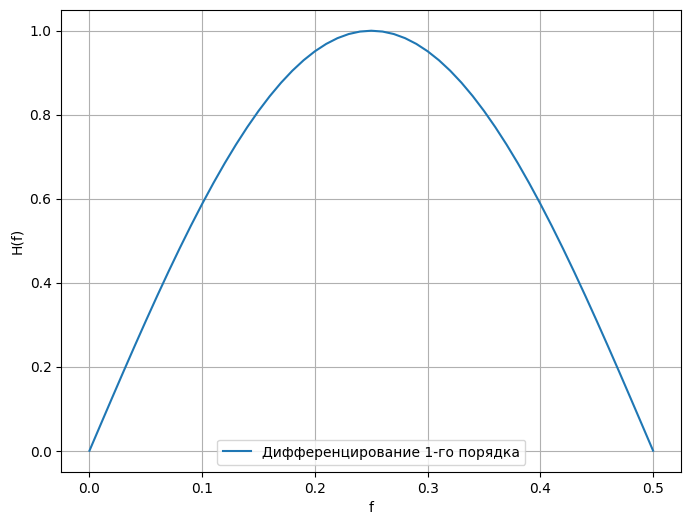

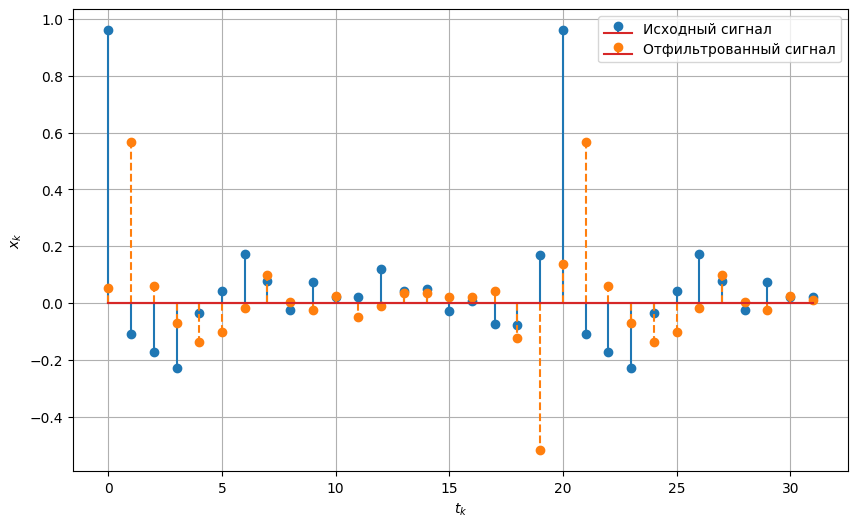

In [7]:
def h_d_1(f):
 return (1j * math.sin(2 * math.pi * f)).imag

f_vals_for_h = np.arange(0, 0.5 + 0.01, 0.01)
plt.figure(figsize=(8, 6))
plt.plot(f_vals_for_h, [h_d_1(f) for f in f_vals_for_h], label="Дифференцирование 1-го порядка")
plt.ylabel("H(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

x_vals = [s(t) for t in t_args]
x_vals_d1 = np.convolve(x_vals, np.array([-1, 0, 1]), 'same') / 2
plt.figure(figsize=(10, 6))
plt.stem(t_args, x_vals, label="Исходный сигнал")
plt.stem(t_args, x_vals_d1, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

График дискретных отсчётов спектра:

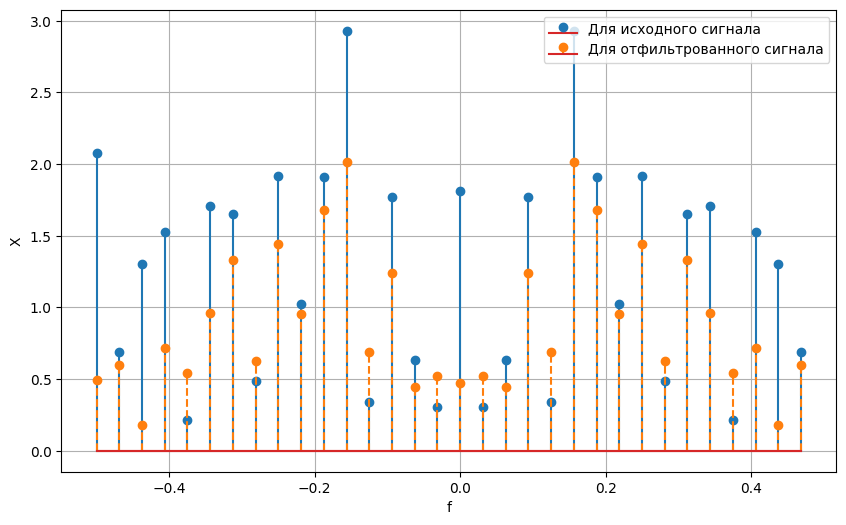

In [8]:
f_vals = fftfreq(N + 1, T)
X_vals_d1 = np.abs(dft(x_vals_d1))

plt.figure(figsize=(10, 6))
plt.stem(f_vals, X_vals, label="Для исходного сигнала")
plt.stem(f_vals, X_vals_d1, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

.

**Б. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона):**
Формула прямоугольников:
$$y_{n+1} = y_n + s_{n+\frac{1}{2}}, y_0 = 0$$
Формула трапеций:
$$y_{n+1} = y_n + \frac{1}{2} (s_n + s_{n+1}), y_0 = 0$$
Формула Симпсона:
$$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n+1} + 4s_n + s_{n+1}), y_0 = 0$$
Передаточная функция для численного интегрирования по формуле прямоугольников:
$$H(\omega) = \frac{e^{\frac{i\omega}{2}}}{e^{i\omega}-1} = \frac{1}{2isin(\frac{\omega}{2})}$$
Передаточная функция для численного интегрирования по формуле трапеций:
$$H(\omega) = \frac{e^{i\omega} + 1}{2(e^{i\omega} - 1)} = \frac{cos(\frac{\omega}{2})}{2isin(\frac{\omega}{2})}$$
Передаточная функция для численного интегрирования по формуле Симпсона:
$$H(\omega) = \frac{e^{-i\omega} + 4 + e^{i\omega}}{3(e^{i\omega} - e^{-i\omega})} = \frac{cos(\omega) + 2}{3isin(\omega)}$$

Передаточная функция для дискретного фильтра:

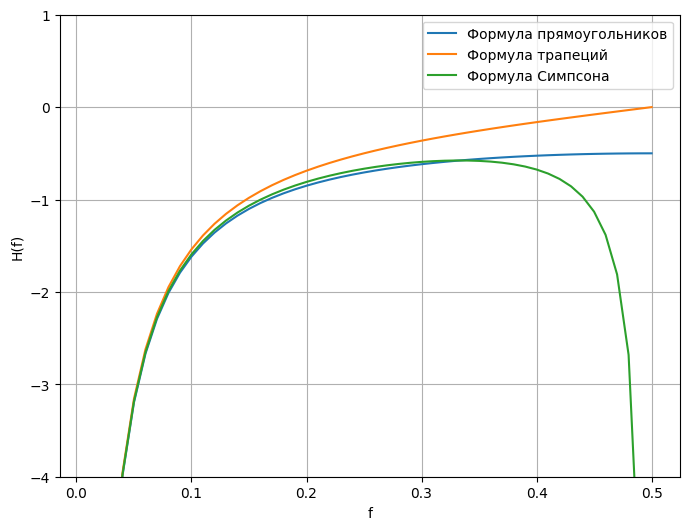

In [9]:
def h_rect(f):
 return (1 / (2j*np.sin(math.pi*f))).imag
def h_trapezoid(f):
 return (np.cos(math.pi*f) / (2j*math.sin(math.pi*f))).imag
def h_simpson(f):
 return ((np.cos(2*math.pi*f)+2)/ (3j*math.sin(2*math.pi*f))).imag

f_vals_h = np.arange(0.01, 0.5 + 0.01, 0.01)

plt.figure(figsize=(8, 6))
plt.plot(f_vals_h, [h_rect(f) for f in f_vals_h], label="Формула прямоугольников")
plt.plot(f_vals_h, [h_trapezoid(f) for f in f_vals_h], label="Формула трапеций")
plt.plot(f_vals_h, [h_simpson(f) for f in f_vals_h], label="Формула Симпсона")
plt.ylabel("H(f)")
plt.xlabel("f")
plt.ylim((-4, 1))
plt.legend()
plt.grid()
plt.show()

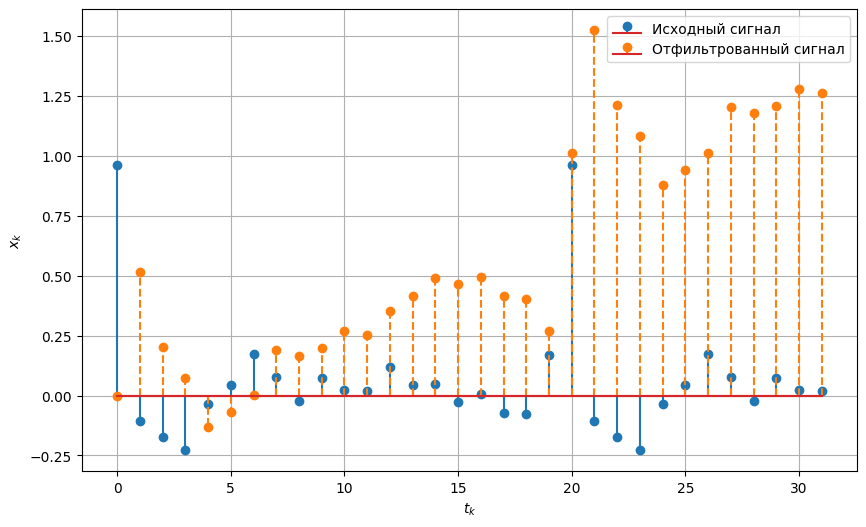

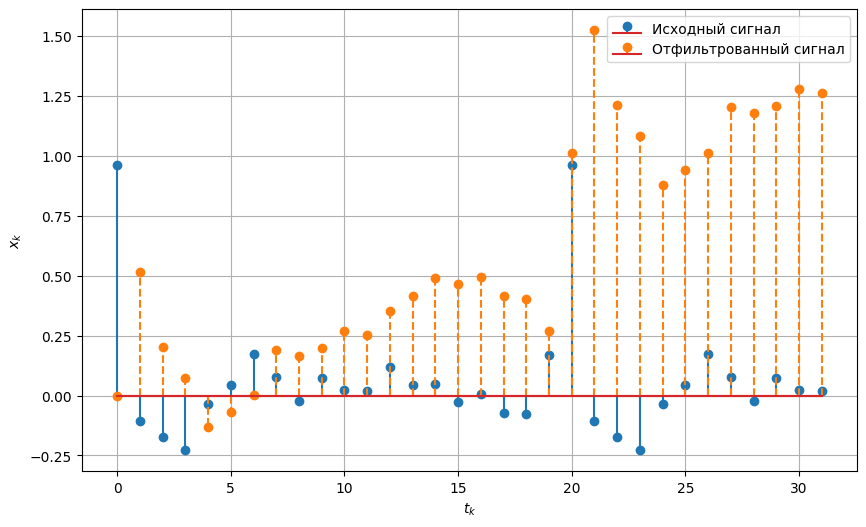

In [12]:
def rectangle():
    x_vals = [s(t) for t in t_args]
    y_vals = [0 for _ in x_vals]
    for i in range(0, len(y_vals) - 1):
        y_vals[i + 1] = y_vals[i] + s(t_args[i] + T/2)
    return y_vals
def trapezoid():
    x_vals = [s(t) for t in t_args]
    y_vals = [0 for _ in x_vals]
    for i in range(0, len(x_vals) - 1):
        y_vals[i + 1] = y_vals[i] + (x_vals[i] + x_vals[i + 1]) / 2
    return y_vals
def simpson():
    x_vals = [s(t) for t in t_args]
    y_vals = [0 for _ in x_vals]
    for i in range(1, len(y_vals)-2):
        y_vals[i + 1] = y_vals[i - 1] + (x_vals[i-1] + 4*x_vals[i] + x_vals[i+1]) / 3
    return y_vals
    
x_vals = [s(t) for t in t_args]
x_vals_rect = rectangle()
x_vals_trap = trapezoid()
x_vals_simpson = simpson()

plt.figure(figsize=(10, 6))
plt.stem(t_args, x_vals, label="Исходный сигнал")
plt.stem(t_args, x_vals_rect, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(t_args, x_vals, label="Исходный сигнал")
plt.stem(t_args, x_vals_rect, linefmt="C1--", markerfmt="C1o",
label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

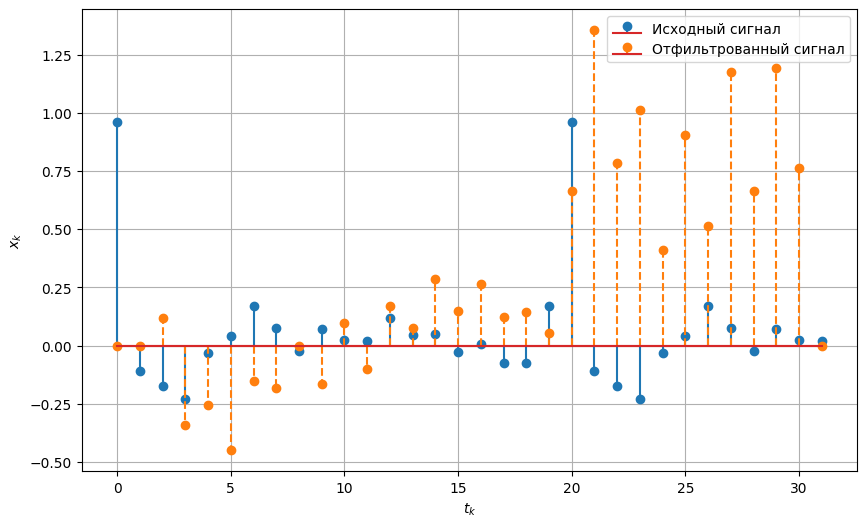

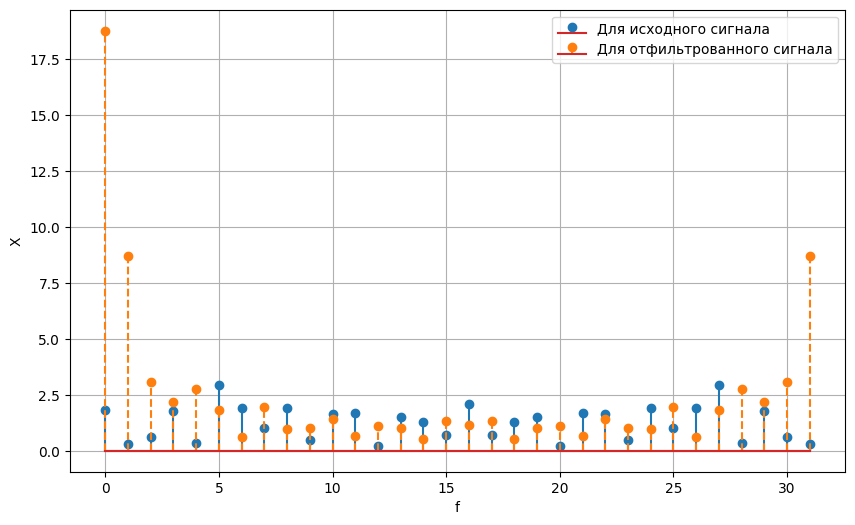

In [11]:
plt.figure(figsize=(10, 6))
plt.stem(t_args, x_vals, label="Исходный сигнал")
plt.stem(t_args, x_vals_simpson, linefmt="C1--", markerfmt="C1o", label="Отфильтрованный сигнал")
plt.ylabel(r"$x_k$")
plt.xlabel(r"$t_k$")
plt.legend()
plt.grid()
plt.show()

f_vals = fftfreq(N + 1, T)
X_vals_d1 = np.abs(dft(x_vals_rect))

plt.figure(figsize=(10, 6))
plt.stem(t_args, X_vals, label="Для исходного сигнала")
plt.stem(t_args, X_vals_d1, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

График дискретных отсчётов спектра для формулы трапеции и для формулы Симпсона:

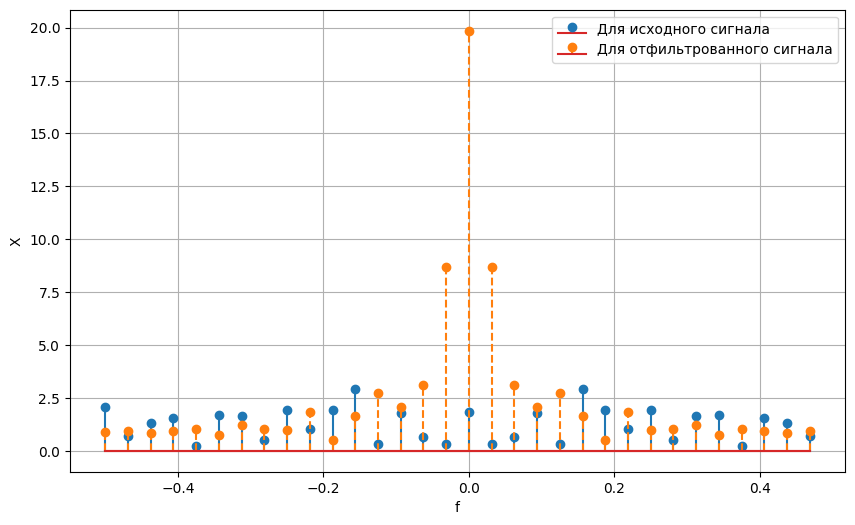

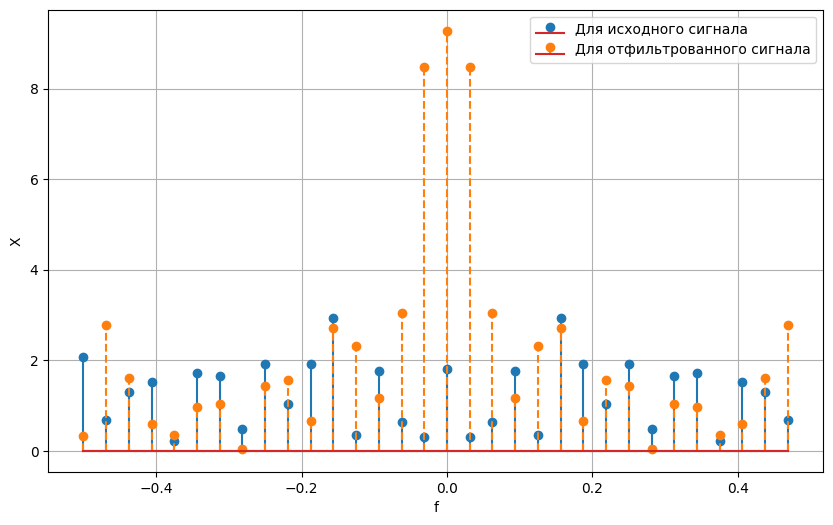

In [18]:
f_vals = fftfreq(N + 1, T)
X_vals_d1 = np.abs(dft(x_vals_trap))
plt.figure(figsize=(10, 6))
plt.stem(f_vals, X_vals, label="Для исходного сигнала")
plt.stem(f_vals, X_vals_d1, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

f_vals = fftfreq(N + 1, T)
X_vals_d1 = np.abs(dft(x_vals_simpson))
plt.figure(figsize=(10, 6))
plt.stem(f_vals, X_vals, label="Для исходного сигнала")
plt.stem(f_vals, X_vals_d1, linefmt="C1--", markerfmt="C1o", label="Для отфильтрованного сигнала")
plt.ylabel("X")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

Результаты в контексте соответствующих передаточных функций H(ω) показывают следующее: на графике передаточной функции для дискретного фильтра можно увидеть, что методы численного интегрирования с использованием формулы трапеций и формулы прямоугольников значительно усиливают низкие частоты, в то время как частоты среднего и высокого диапазона ослабляются. При этом формула трапеций оказывает более сильное влияние на ослабление средних и высоких частот по сравнению с формулой прямоугольников. В отличие от этих двух методов, формула Симпсона, напротив, значительно усиливает как низкие, так и высокие частоты, ослабляя лишь средние.

## Выводы

В результате выполнения практической работы была исследована фильтрация дискретных последовательностей при помощи рекурсивных фильтров, которые основываются на формулах численного интегрирования и дифференцирования. Также, при помощи дискретных преобразований Фурье, производился анализ полученных результатов. В ходе практической работы был сгенерирован аналоговый сигнал, который в дальнейшем был дискретизирован, а также для него был построен спектр в виде набора дискретных отсчетов. Было выяснено, что с помощью спектра можно посмотреть наличие в исходном сигнале множество различных частот.

В ходе выполнения практической работы были изучены и применены следующие фильтры: фильтр линейного сглаживания, дискретные фильтры, соответствующие численному дифференцированию 1-го порядка и численному интегрированию, произведенному по методам прямоугольков, а также трапеций и парабол. В результате работы, по спектру можно сделать следующий вывод о рассматриваемом фильтре, соответствующем дииференцированию 1-го порядка: данный фильтр имеет полосу пропускания в области средних частот, а также уменьшает амплитуду низких и высоких частот. Также было определено, что фильтры, соответствующие численному интегрированию по формуле трапеций и по формуле прямоугольников значительно усиливают низкие частоты, а средние и высокие подавляют. У формулы трапеций, в отличие от формулы прямоугольников, наблюдается понижение средних и высоких частот больше. Формула Симпсона заметно усиливает низкие и высокие частоты,а средние подавляет, что является отличительной особенностью в сравнении с формулой трапеции и прямоугольника.